In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from numpy import random as rng
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

In [2]:
def population(N, M, value=1):
    lattice = (value, (N,M))
    return np.full((N, M), value)

In [3]:
def plotpop(population, left=0, right=0, bottom=0, top=0): #add value to axes
    fig, ax = plt.subplots()
    
    cmap = plt.cm.ocean
    norm = plt.Normalize(-1, 1) #i will only have 3 values, so they'll always be the same colors
    
    im = ax.imshow(population, cmap=cmap, norm=norm, aspect = 'equal')
    return im

A normal population is going to be 1s, immunized will be 0s, infected will be -1s

In [4]:
def randomperson(population):
    #make one variable x the width of the lattice: x = np.shape(lattice)[0]
    #make one variable y the height of the lattice: y = np.shape(lattice)[1]
    #rn_x is a random integer from 0 to x: rn_x = rng.randint(0,x)
    #rn_y is a random integer from 0 to y: rn_y = rng.randint(0,y)
    #define (rn_x, rn_y) in lattice: particle = lattice[rn_x, rn_y]
    x = np.shape(population)[0]
    y = np.shape(population)[1]
    rn_x = rng.randint(0,x)
    rn_y = rng.randint(0,y)
    person = rn_x, rn_y
    return person

In [5]:
def immunize(population, person):
    new_val = 0
    p_x = person[0]
    p_y = person[1]
    population[p_x][p_y] = new_val
    return population

In [6]:
def percimmune(perc, population):
    N = np.shape(population)[0]
    M = np.shape(population)[1]
    popdim = N * M
    numimmune = int(perc * popdim)
    i = 0
    while i < numimmune:
        r = randomperson(population)
        r_x = r[0]
        r_y = r[1]
        while population[r_x][r_y] == 0:
            r = randomperson(population)
            r_x = r[0]
            r_y = r[1]
        population = immunize(population, r)
        i += 1
    return population

array([1, 1, 0, 1, 0, 1, 1, 1, 1, 0])

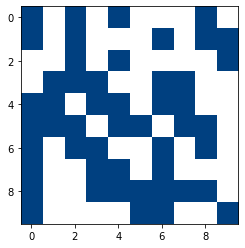

In [7]:
p = population(10,10)
newp = percimmune(.5, p)
plotpop(newp)
newp[2]

In [8]:
def copypopulation(population):
    lattice = population
    return lattice

In [9]:
def infect(population, person):
    p_x = person[0]
    p_y = person[1]
    val = population[p_x][p_y]
    new_val = ((val**2) * -1)    #if val is 0, this will return 0; if it is either 1 or -1, it will return -1
    newpop = copypopulation(population)
    newpop[p_x][p_y] = new_val
    return newpop

In [18]:
def infectneighbors(pop):
    
    bound_x = np.shape(pop)[0] - 1
    bound_y = np.shape(pop)[1] - 1
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]

    newpop = copypopulation(pop)
    
    infectedcells = []
    
    j = 0
    while j < M:
        i = 0
        while i < N:
            if pop[i][j] == -1:
                infectedcells.append((i,j))    
            i += 1
        j += 1

    for (i,j) in infectedcells:
        if i == 0:
            person = (i+1, j)
            newpop = infect(newpop, person)
        elif i == bound_x:
            person = (i-1, j)
            newpop = infect(newpop, person)
        else: #i in between
            person1 = (i-1, j)
            newpop = infect(newpop, person1)
            person2 = i+1, j
            newpop = infect(newpop, person2)
        if j == 0:
            person = (i, j+1)
            newpop = infect(newpop, person)
        elif j == bound_y:
            person = (i, j-1)
            newpop = infect(newpop, person)
        else: #j in between
            person1 = (i, j-1)
            newpop = infect(newpop, person1)
            person2 = (i, j+1)
            newpop = infect(newpop, person2)

    return newpop

In [19]:
def infectradius(pop, radius):
    r = radius + 1
    
    bound_x = np.shape(pop)[0] - 1
    bound_y = np.shape(pop)[1] - 1
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]

    newpop = copypopulation(pop)
    
    infectedcells = []
    j = 0
    while j < M:
        i = 0
        while i < N:
            if pop[i][j] == -1:
                infectedcells.append((i,j))    
            i += 1
        j += 1

    for (i,j) in infectedcells:
        if i == 0:
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person = (i+k, j+l)
                        newpop = infect(newpop, person)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person = (i+k, j-l)
                        newpop = infect(newpop, person)
            else: #j in between
                for k in range(r):
                    for l in range(r):
                        person1 = (i+k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j+l)
                        newpop = infect(newpop, person2)
        elif i == bound_x:
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person = (i-k, j+l)
                        newpop = infect(newpop, person)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person = (i-k, j-l)
                        newpop = infect(newpop, person)
            else: #j in between
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i-k, j+l)
                        newpop = infect(newpop, person2)
        else: #i in between
            if j == 0:
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j+l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j+l)
                        newpop = infect(newpop, person2)
            elif j == bound_y:
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i+k, j-l)
                        newpop = infect(newpop, person2)
            else: #j in between
                for k in range(r):
                    for l in range(r):
                        person1 = (i-k, j-l)
                        newpop = infect(newpop, person1)
                        person2 = (i-k, j+l)
                        newpop = infect(newpop, person2)
                        person3 = (i+k, j-l)
                        newpop = infect(newpop, person3)
                        person4 = (i+k, j+l)
                        newpop = infect(newpop, person4)

    return newpop

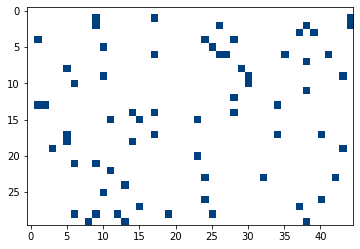

In [20]:
p = population(30,45)
percimmune(.05, p)
newp = infect(p, (15, 23))
infectneighbors(newp)
plotpop(newp)

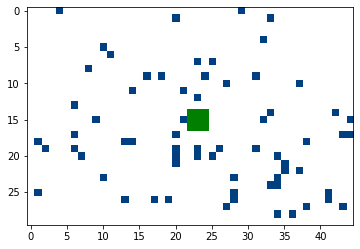

In [21]:
p = population(30,45)
percimmune(.05, p)
newp = infect(p, (15, 23))
infectradius(newp, 1)
plotpop(newp)

In [22]:
def runinfectn(pop, iterations):
    i = 0
    while i < iterations:
        infectneighbors(pop)
        i += 1
    plotpop(pop)

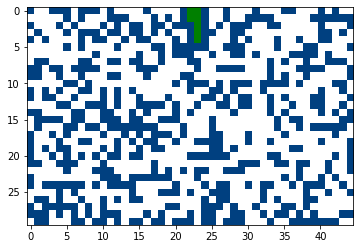

In [23]:
p = population(30,45)
percimmune(.4, p)
newp = infect(p, (0, 23))
runinfectn(newp, 30)

In [24]:
def runinfectr(pop, radius, iterations):
    i = 0
    while i < iterations:
        infectradius(pop, radius)
        i += 1
    plotpop(pop)

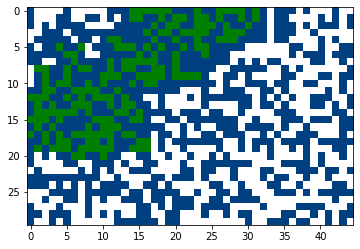

In [25]:
p = population(30,45)
percimmune(.5, p)
newp = infect(p, (0, 23))
runinfectr(newp, 1, 25)

In [26]:
def ifduplicates(array):

    arraycopy = []
    
    for x in array:
        arraycopy.append(x)
    
    newarray = []
    for x in array:
        if x not in newarray:
            newarray.append(x)
    for y in newarray:
        array.remove(y)

    if len(array) == 0:
        return arraycopy, 0
    else:
        return arraycopy, len(array)

In [58]:
def nfinditeration(pop, perc):
    
    popcopy = pop.copy()
    
    its = 0
    healthycells = []
    lenhealthycells = []
    
    percimmune(perc, pop)
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    loop = 0
    while loop < 1:
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == 1:
                    healthycells.append((i,j))
                elif pop[i][j] == 0:
                    healthycells.append((i,j))
                i += 1
            j += 1
        
        num = len(healthycells)
        lenhealthycells.append(num) 
        
        (lenhealthycells, num) = ifduplicates(lenhealthycells)
        
        if len(healthycells) == dimpop:
            infect(pop, randomperson(pop))
            lenhealthycells.clear()
        else:
            if num > 0:
                loop = 1
            elif len(healthycells) > 0:
                pop = infectneighbors(pop)
                healthycells.clear()
            else:
                loop = 1
        its += 1
    return its, popcopy

41


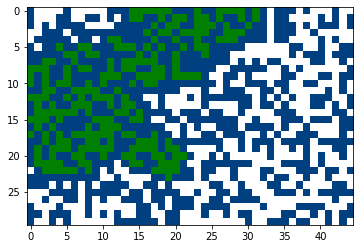

In [59]:
p = population(17,41)
infect(p, (8, 20))
i = nfinditeration(p, 0.5)[0]
print(i)
runinfectn(newp, i)

In [61]:
def rfinditeration(pop, perc, r):
    
    popcopy = pop.copy()
    
    its = 0
    healthycells = []
    lenhealthycells = []
    
    percimmune(perc, pop)
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    loop = 0
    while loop < 1:
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == 1:
                    healthycells.append((i,j))
                elif pop[i][j] == 0:
                    healthycells.append((i,j))
                i += 1
            j += 1
        
        num = len(healthycells)
        lenhealthycells.append(num) 
        
        (lenhealthycells, num) = ifduplicates(lenhealthycells)
        
        if len(healthycells) == dimpop:
            infect(pop, randomperson(pop))
            lenhealthycells.clear()
        else:
            if num > 0:
                loop = 1
            elif len(healthycells) > 0:
                pop = infectradius(pop,r)
                healthycells.clear()
            else:
                loop = 1
        its += 1
    return its, popcopy

26


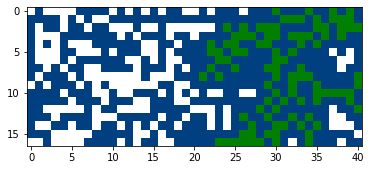

In [62]:
p = population(17,41)
infect(p, (8, 20))
i = rfinditeration(p, 0.6, 1)[0]
print(i)
runinfectr(p, 1, i)

In [117]:
def immuneeffect(pop):
    
    N = np.shape(pop)[0]
    M = np.shape(pop)[1]
    
    dimpop = N * M
    
    p_im = []
    p_inf = []
    
    percent = 0


    (its, popcopy) = nfinditeration(pop, percent)
    
    plotpop(popcopy)
    
    while percent < 1:
        pop = popcopy.copy()
        nfinditeration(pop, percent)
        numinfected = 0
        j = 0
        while j < M:
            i = 0
            while i < N:
                if pop[i][j] == -1:
                    numinfected += 1
                i += 1
            j += 1
        inffrac = float(numinfected/dimpop)
        p_inf.append(inffrac)
        p_im.append(percent)
        percent += .01
    
    if percent == 1:
        p_im.append(1)
        p_inf.append(0)
    
    plt.clf()
    plt.plot(p_im, p_inf)
    plt.title('percent immunized vs. percent infected')
    plt.grid(True)
    plt.show()

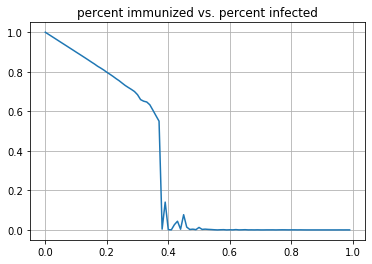

In [119]:
p = population(100,100)
infect(p, (5, 5))
immuneeffect(p)